# Trying out NumPy's SVD on Medical Images

In [2]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image

%matplotlib inline

In [3]:
#Parameters
vmin = 0
vmax = 1
image_bias = 1 

Import image to take SVD of

Size of the image is :  (300, 300)


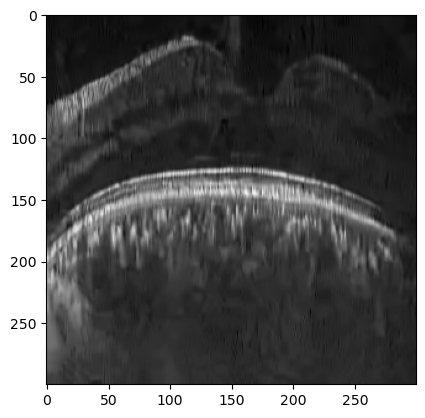

In [37]:
# Open the PNG image
image = Image.open('bm3d_output1.tiff')

# Convert the image to grayscale
grayscale_image = image.convert('L')

# Convert the image to a NumPy array
A = np.array(grayscale_image)

# Remember image size
n = len(A)
print("Size of the image is : " , A.shape)

# Show image
imshow(A, cmap='gray')
plt.show()

## Taking SVD

In [38]:
U, S, V = svd(A)

## Observing U

In [39]:
# Size of U
print("Size of U is: ", U.shape)

Size of U is:  (300, 300)


In [40]:
print(np.round(U,2))

[[-0.02 -0.   -0.   ...  0.02 -0.05 -0.07]
 [-0.02 -0.    0.   ... -0.08  0.06  0.02]
 [-0.02 -0.    0.   ... -0.01  0.08  0.08]
 ...
 [-0.05  0.01  0.01 ... -0.01 -0.01 -0.04]
 [-0.04  0.01  0.01 ...  0.01 -0.    0.12]
 [-0.04  0.01  0.01 ... -0.    0.02 -0.09]]


## Observing S

In [41]:
# Size of U
print("Size of Sigma is: ", S.shape)

Size of Sigma is:  (300,)


In [42]:
sigma = np.diag(S)
print(np.round(sigma,2))

[[1.767882e+04 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 4.645640e+03 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 0.000000e+00 3.019990e+03 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 ...
 [0.000000e+00 0.000000e+00 0.000000e+00 ... 1.000000e-01 0.000000e+00
  0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 6.000000e-02
  0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  3.000000e-02]]


NumPy saves sigma as a vector not a Matrix. Remember to create a diagonal matrix from it first.

## Observing V

In [43]:
# Size of V
print("Size of V is: ", V.shape)

Size of V is:  (300, 300)


In [44]:
print(np.round(V,2))

[[-0.07 -0.07 -0.07 ... -0.03 -0.03 -0.03]
 [ 0.14  0.15  0.13 ...  0.03  0.03  0.02]
 [ 0.15  0.16  0.13 ...  0.02  0.03  0.03]
 ...
 [-0.05  0.05  0.04 ... -0.05 -0.09 -0.09]
 [-0.01  0.02  0.03 ... -0.   -0.04  0.1 ]
 [-0.01  0.05 -0.02 ... -0.06 -0.04  0.09]]


## Taking Sums

### First matrix

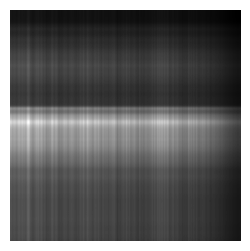

In [45]:
# Get first matrix
first = S[0]*np.outer(U[:,0],V[0])

# Plot first matrix
plt.figure(figsize=(3, 3))  # Adjust the size as needed
plt.imshow(first, cmap='gray')
plt.axis('off')
plt.show()

### Second Matrix + Overall sum

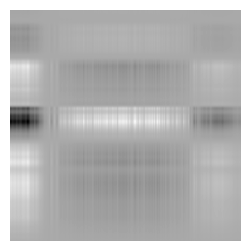

In [46]:
# Get first matrix
second = S[1]*np.outer(U[:,1],V[1])

# Plot scond matrix
plt.figure(figsize=(3, 3))  # Adjust the size as needed
plt.imshow(second, cmap='gray')
plt.axis('off')
plt.show()

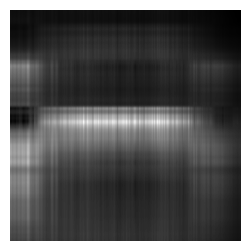

In [47]:
# Plot overall sum
img_sum = first + second

plt.figure(figsize=(3, 3))  # Adjust the size as needed
plt.imshow(img_sum, cmap='gray')
plt.axis('off')
plt.show()

### Third matrix + overall sum

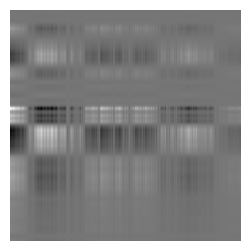

In [48]:
# Get first matrix
third = S[2]*np.outer(U[:,2],V[2])

# Plot scond matrix
plt.figure(figsize=(3, 3))  # Adjust the size as needed
plt.imshow(third, cmap='gray')
plt.axis('off')
plt.show()

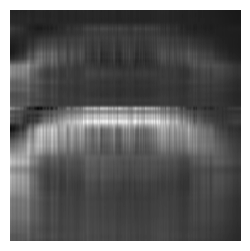

In [49]:
# Plot overall sum
img_sum += third

plt.figure(figsize=(3, 3))  # Adjust the size as needed
plt.imshow(img_sum, cmap='gray')
plt.axis('off')
plt.show()

## Get first N Sums

In [50]:
def get_image(U, S, V, N = 50, plot=True):
    final_img = np.zeros((n, n))
    
    for i in range(N):
        matrix = S[i]*np.outer(U[:,i],V[i])
        final_img += matrix
    
    if plot:
        plt.figure(figsize=(5, 5))
        plt.imshow(final_img, cmap='gray')
        plt.axis('off')
        plt.show()
    
    return final_img

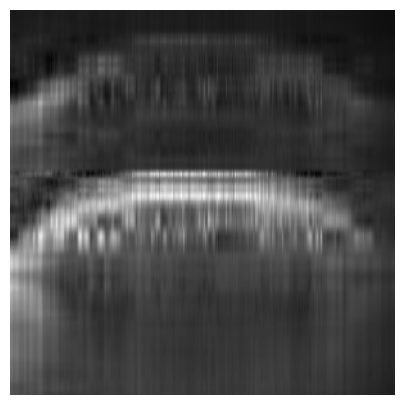

In [51]:
N_5 = get_image(U, S, V, N = 5)

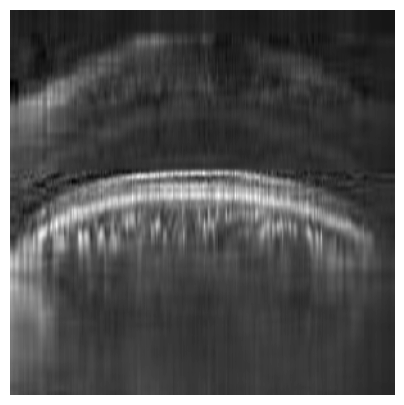

In [52]:
N_10 = get_image(U, S, V, N = 10)

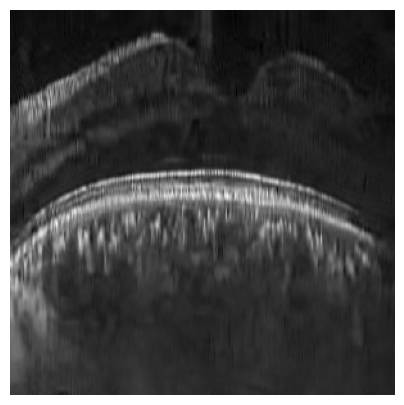

In [53]:
N_50 = get_image(U, S, V, N = 50)

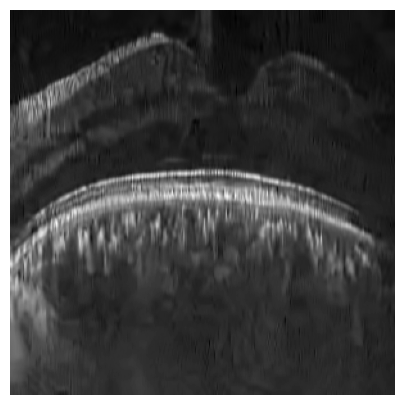

In [54]:
N_100 = get_image(U, S, V, N = 100)

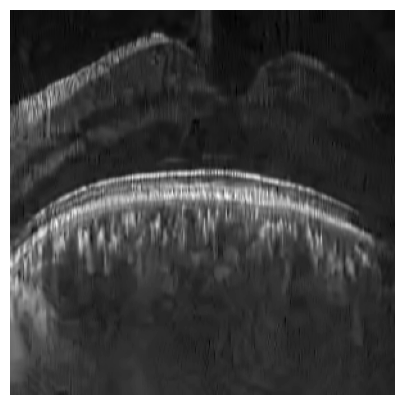

In [55]:
N_250 = get_image(U, S, V, N = 250)

## Plotting it all

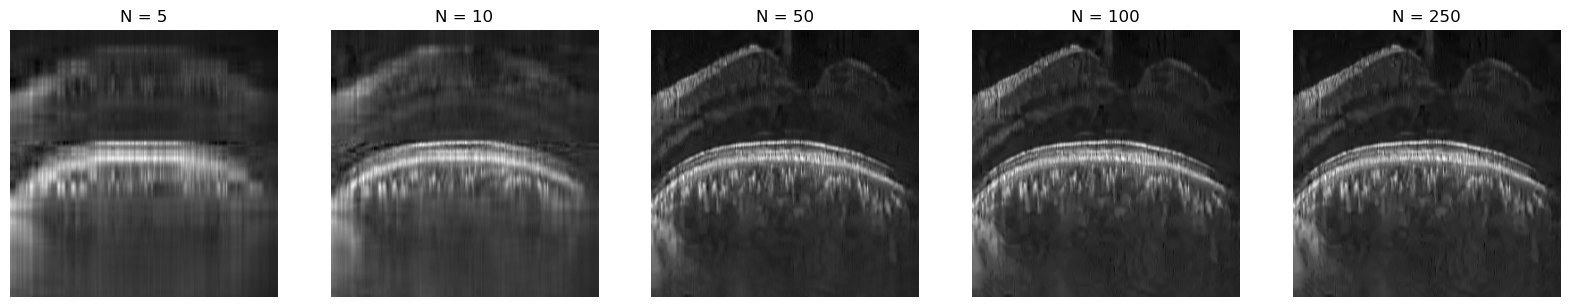

In [56]:
images = [N_5, N_10, N_50, N_100, N_250]
N_values = [5, 10, 50, 100, 250]

# Create a figure and subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

# Plot each image on a separate subplot
for i in range(5):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title('N = {}'.format(N_values[i]))

plt.show()

## Compare Original and Truncated

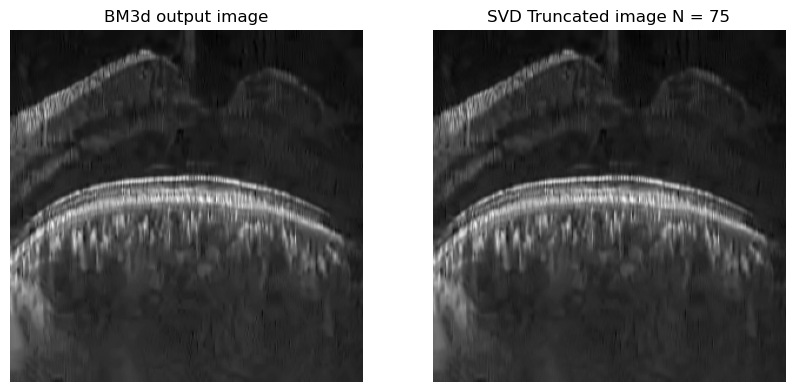

In [64]:
power = 75
trunc = get_image(U, S, V, N = power, plot=False)

plt.figure(figsize=(10, 5))  # Adjust the figure size as needed

# Plot original on the left
plt.subplot(1, 2, 1)
plt.imshow(A, cmap='gray')
plt.axis('off')
plt.title('BM3d output image')

# Plot truncated on the right
plt.subplot(1, 2, 2)
plt.imshow(trunc, cmap='gray')
plt.axis('off')
plt.title('SVD Truncated image N = {}'.format(power))

plt.show()

## Optimal truncation

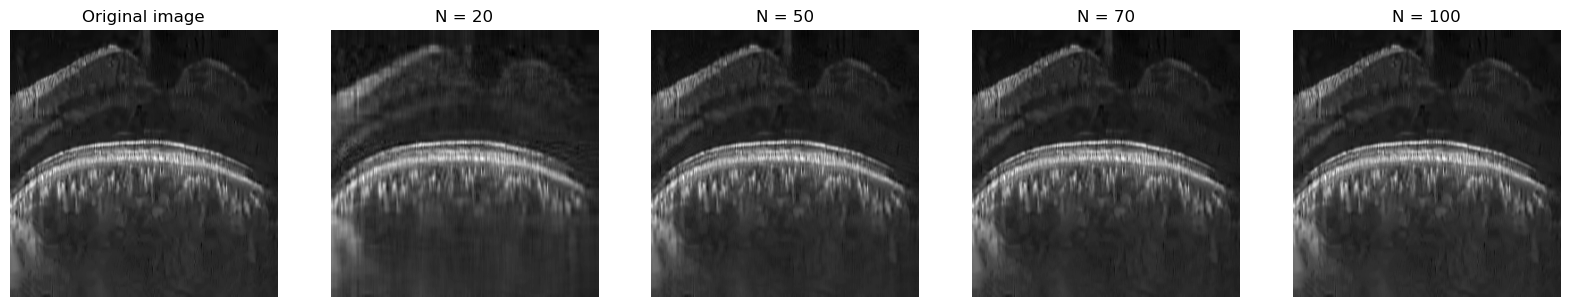

In [59]:
images = []
N_values = [20, 50, 70,100]

for N in N_values:
    trunc = get_image(U, S, V, N, plot=False)
    images.append(trunc)

# Create a figure and subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

# Plot original
axes[0].imshow(A, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original image')

# Plot each image on a separate subplot
for i in range(4):
    axes[1+i].imshow(images[i], cmap='gray')
    axes[1+i].axis('off')
    axes[1+i].set_title('N = {}'.format(N_values[i]))
    

plt.show()

## Difference

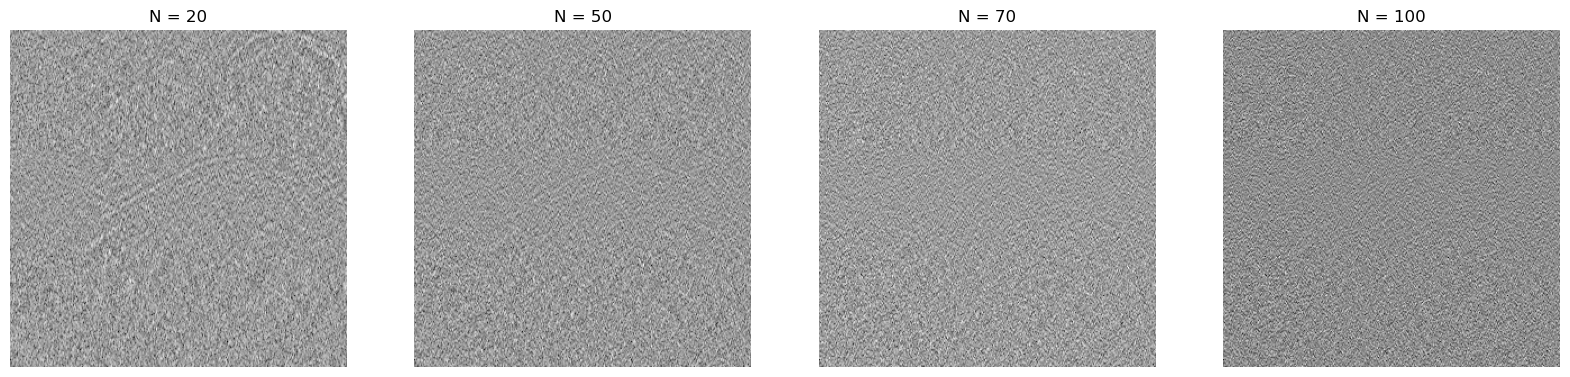

In [31]:
diffs = []
for image in images:
    diffs.append(A-image)

# Create a figure and subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 10))

# Plot each image on a separate subplot
for i in range(4):
    axes[i].imshow(diffs[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title('N = {}'.format(N_values[i]))